In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
revenue_df=pd.read_csv('Restaurant_revenue.csv')

In [3]:
revenue_df

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121
...,...,...,...,...,...,...,...,...
995,73,41.307842,12.122931,Japanese,19.033585,1,40,249.312034
996,31,20.615496,5.822885,Mexican,17.040990,0,57,110.228767
997,69,17.110656,4.141898,Japanese,44.649315,0,55,312.212552
998,73,37.664722,3.046556,Japanese,27.767358,0,23,272.482204


In [4]:
encoded_df = pd.get_dummies(revenue_df, columns=['Cuisine_Type'], drop_first=True)

In [5]:
revenue_df.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [6]:
revenue_df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [7]:
Skew=revenue_df['Menu_Price'].skew()
Skew

-0.05532986460496195

In [8]:
Kurtosis=revenue_df['Monthly_Revenue'].kurtosis()
Kurtosis

-0.2813844362516238

In [9]:
def create_relational_graph(data, x, y):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, hue=data['Cuisine_Type'], palette='Set2', legend='full', s=100)
    plt.xlabel("Menu Price", fontsize=12)
    plt.ylabel("Monthly Revenue", fontsize=12)
    plt.title("Relationship between Menu Price and Monthly Revenue", fontsize=14)
    plt.legend(title='Cuisine Type', fontsize=10, title_fontsize=12)
    plt.show()

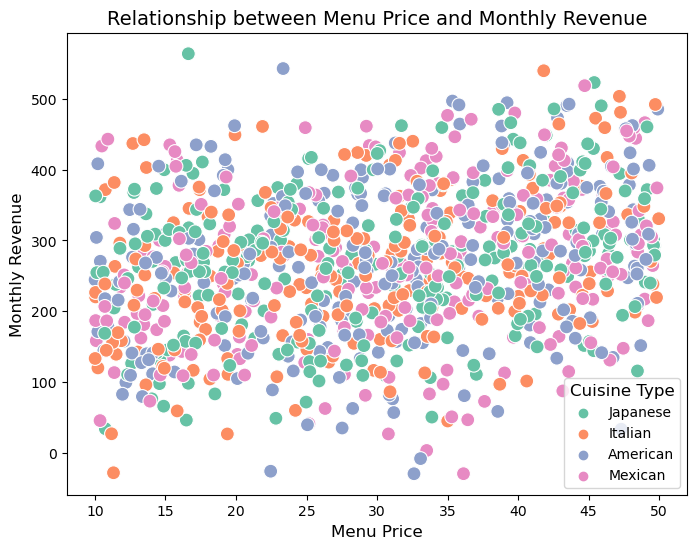

In [10]:
create_relational_graph(revenue_df, revenue_df['Menu_Price'], revenue_df['Monthly_Revenue'])

In [11]:
def create_categorical_graph(data, x, y):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, data=data)
    plt.xlabel("Cuisine Type", fontsize=12)
    plt.ylabel("Average Customer Spending", fontsize=12)
    plt.title("Average Customer Spending by Cuisine Type", fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

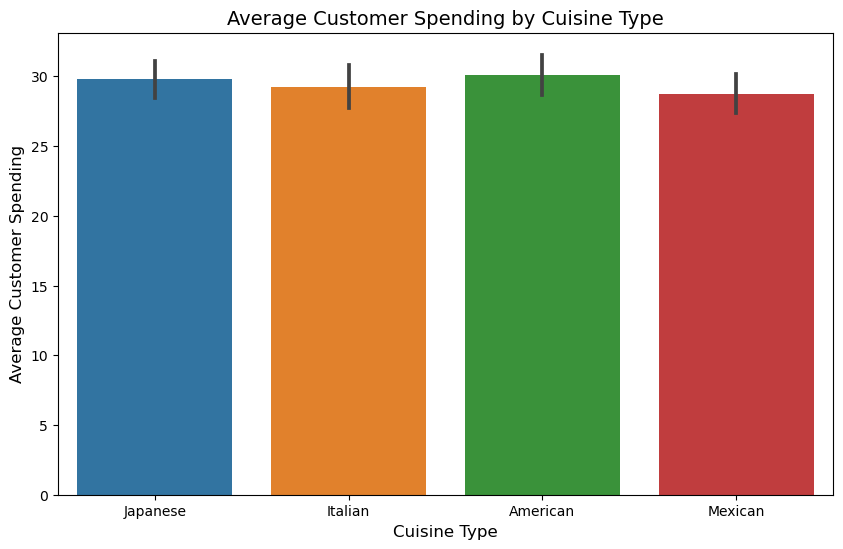

In [12]:
create_categorical_graph(revenue_df, 'Cuisine_Type', 'Average_Customer_Spending')

In [13]:
def create_statistical_graph(data):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
    plt.title("Correlation Heatmap", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

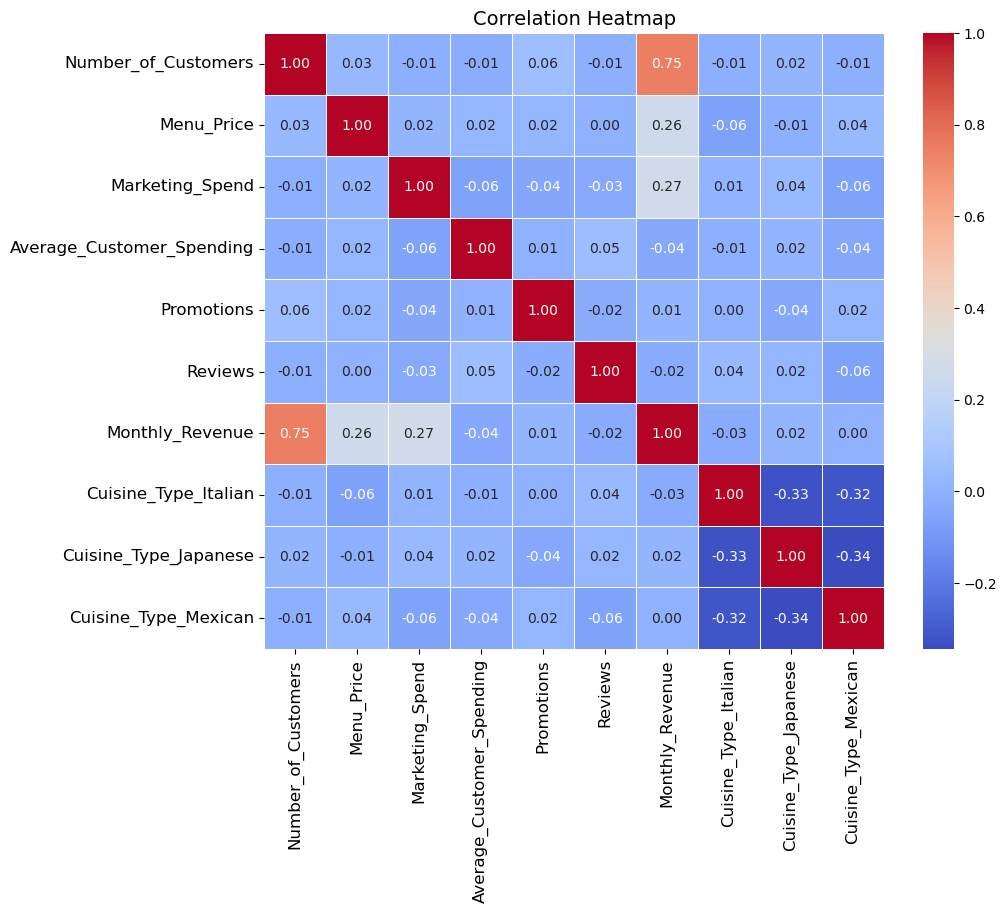

In [14]:
create_statistical_graph(encoded_df)

In [15]:
def perform_clustering(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters, kmeans

In [16]:
def plot_clustering(data, clusters, kmeans):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='Menu_Price', y='Monthly_Revenue', hue=clusters, palette='Set1', legend='full', s=100)

    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=300, c='black', label='Centroids')
    plt.xlabel("Menu Price", fontsize=12)
    plt.ylabel("Monthly Revenue", fontsize=12)
    plt.title("Clustering Plot with Centroids", fontsize=14)
    plt.legend(title='Cluster', fontsize=10, title_fontsize=12)
    plt.show()

In [17]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(encoded_df[['Menu_Price', 'Monthly_Revenue']])

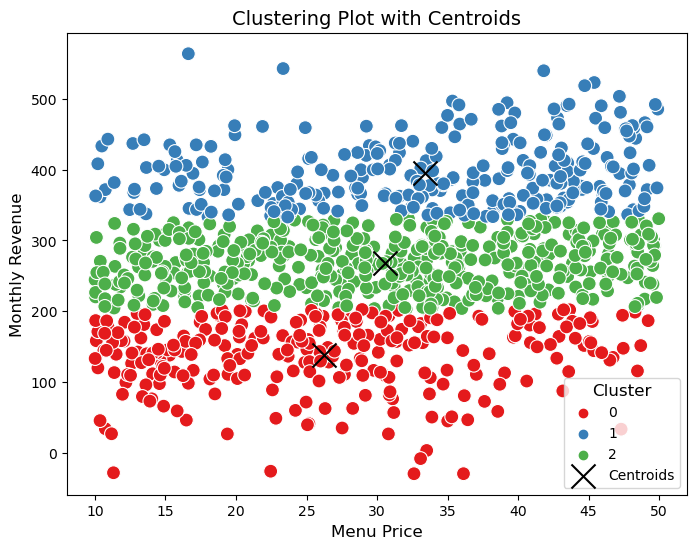

In [18]:
plot_clustering(encoded_df, clusters, kmeans)

In [19]:
def perform_fitting(x, y):
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y)
    return model

In [20]:
def plot_fitting(data, model):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['Menu_Price'], data['Monthly_Revenue'], color='blue', label='Data points')
    plt.plot(data['Menu_Price'], model.predict(data['Menu_Price'].values.reshape(-1, 1)), color='red', label='Fitted line')
    plt.xlabel("Menu Price", fontsize=12)
    plt.ylabel("Monthly Revenue", fontsize=12)
    plt.title("Linear Regression Fitting", fontsize=14)
    plt.legend()
    plt.show()

In [21]:
model = perform_fitting(encoded_df['Menu_Price'], encoded_df['Monthly_Revenue'])

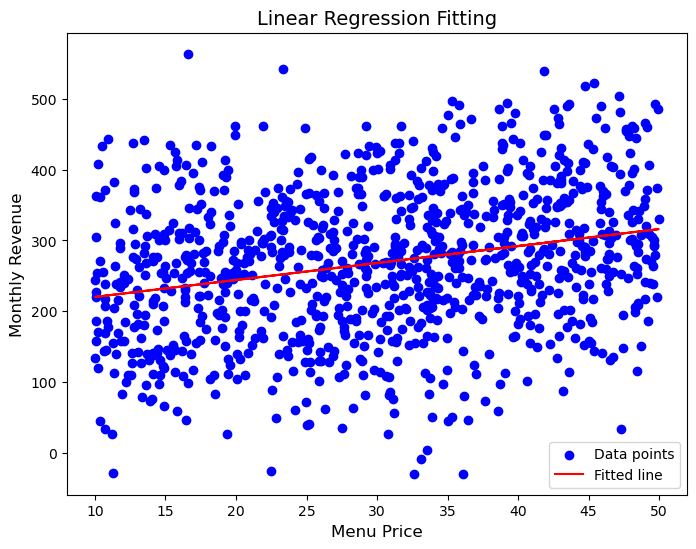

In [22]:
plot_fitting(encoded_df, model)

In [23]:
def plot_elbow_method(data, max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

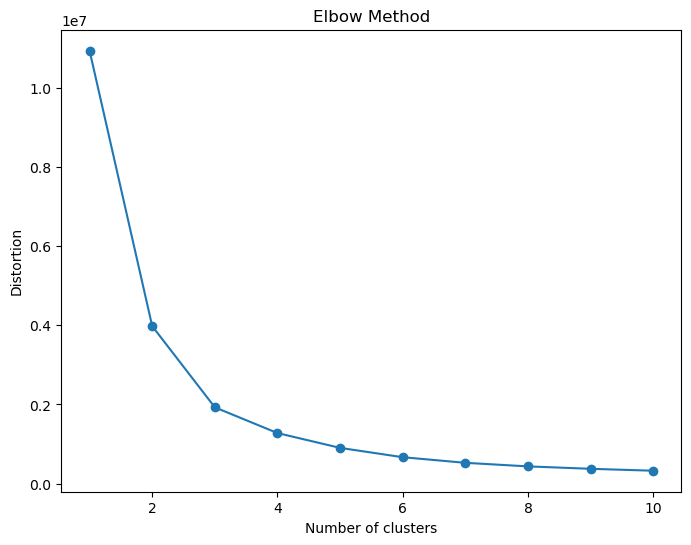

In [24]:
plot_elbow_method(encoded_df[['Menu_Price', 'Monthly_Revenue']], 10)